### Introduction to Time Series Example 3.7:
We look again at the `AirPassengers` data and estimate the trend by a moving average filter. In `Python` we can select a window and average using `rolling()` and `mean()` respectively. 

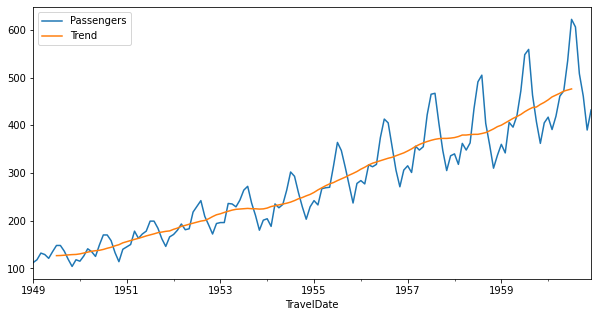

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
AirP = pd.read_csv('./data/AirPassengers.csv', parse_dates=True)

# Create pandas DateTimeIndex
dtindex = pd.DatetimeIndex(data=pd.to_datetime(AirP["TravelDate"]), 
                           freq='infer')
# Set as Index
AirP.set_index(dtindex, inplace=True)
AirP.drop("TravelDate", axis=1, inplace=True)

# Calculate and save Trend
AirP["Trend"] = AirP["Passengers"].rolling(window=12, center=True).mean()

# Plots
fig, ax = plt.subplots(figsize=(10, 5))
AirP.plot(y=["Passengers", "Trend"], ax=ax)
plt.show()

The estimated trend $\hat m_k$ line does not exhibit any seasonal fluctuations. 

### Introduction to Time Series Example 3.8:
We take a look at the `AirPassengers` data and subtract the estimated trend and average over the months. The average per month is found by going over every month in the dataset, selecting all entries in the same month, and taking the mean value. 

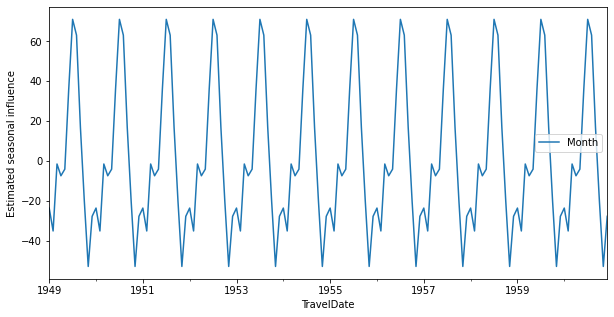

In [2]:
# Create new Column Season, where the Trend is substracted
AirP["Season"] = AirP["Passengers"] - AirP["Trend"]

# Now find the mean per month
AirP["Month"] = np.zeros(AirP.shape[0])
                         
# For every month, calculate mean:
for month in AirP.index.month.unique():
    mean = AirP.loc[AirP.index.month == month, "Season"].mean()
    AirP.loc[AirP.index.month == month, "Month"] = mean

# Plots
fig, ax = plt.subplots(figsize=(10, 5))
AirP.plot(y="Month", ax=ax)
ax.set_ylabel("Estimated seasonal influence")
plt.show()

### Introduction to Time Series Example 3.9:
We again cosider the `AirPassengers` data and subtract the estimated trend and seasonal effects

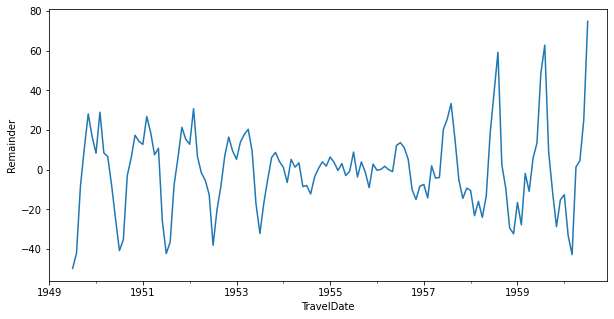

In [3]:
# Create new Column remainder, where both season and Trend are substracted
AirP["Remainder"] = AirP["Passengers"] - AirP["Trend"] - AirP["Month"]

# Plots
fig, ax = plt.subplots(figsize=(10, 5))
AirP["Remainder"] .plot(ax=ax)
ax.set_ylabel("Remainder")
plt.show()

The figure shows the estimated remainder term $\hat r$. It is striking that there is non-random structure left in the remainder term. The reason for that is, that the linear decomposition model is not true in this case. We hence repeat the steps above for the *logarithm* of `AirPassengers` which amounts to a multiplicative model.

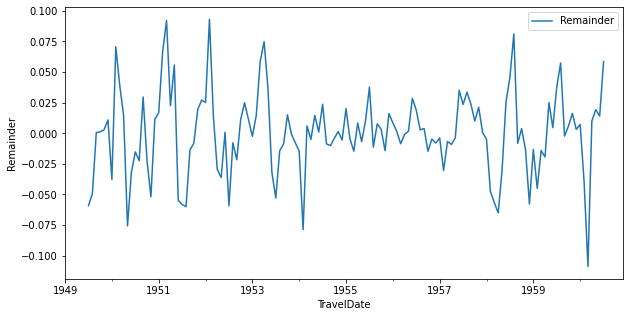

In [4]:
# Manual Logarithmic transform 
AirP_log = pd.DataFrame(
    data = {"log_Passengers": np.log(AirP["Passengers"])}, 
    index = AirP.index)

AirP_log["Trend"] = AirP_log["log_Passengers"]\
                    .rolling(window=12, center=True)\
                    .mean()
AirP_log["Season"] = AirP_log["log_Passengers"] - AirP_log["Trend"]
AirP_log["Month"] = np.zeros(AirP.shape[0])
                         
# For every month, calculate mean:
for month in AirP_log.index.month.unique():
    mean = AirP_log.loc[AirP.index.month == month, "Season"].mean()
    AirP_log.loc[AirP_log.index.month == month, "Month"] = mean
    
AirP_log["Remainder"] = AirP_log["log_Passengers"] \
                        - AirP_log["Trend"] \
                        - AirP_log["Month"]
    
# Plots
fig, ax = plt.subplots(figsize=(10, 5))
AirP_log.plot(y="Remainder", ax=ax)
ax.set_ylabel("Remainder")
plt.show()

We see in the remainder estimated for the log-data that the non-random parts in the signal have diminished considerably. 

There is a convenient way to perform a time series decomposition based on moving averages in **Python**. The `seasonal_decompose()` function from `statsmodels.tsa.seasonal` can be applied to a time series and performs the above steps. So the decomposition of the logarithmic `AirPassengers` data can be performed by the following code:

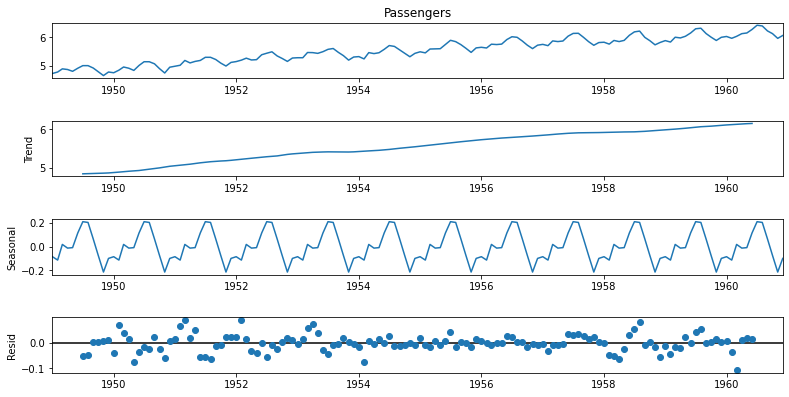

In [5]:
# Decomposition on log-model using seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(np.log(AirP["Passengers"]), 
                            model = "additive")

# Plot
fig = decomp.plot()
fig.set_size_inches(12, 6)
plt.show()


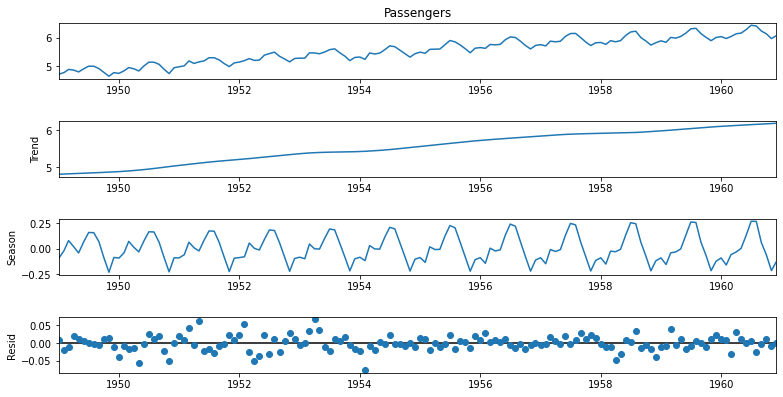

In [6]:
from statsmodels.tsa.seasonal import STL

# Decomposition on log-model using STL
decomp = STL(np.log(AirP["Passengers"]), seasonal=9)
decomp = decomp.fit()

# Plot
fig = decomp.plot()
fig.set_size_inches(12, 6)
plt.show()

The figure shows the decomposition of the data. Note that the seasonal component is changing over time and the remainder term is much smaller than in the previous example. 

- It becomes obvious that the seasonal contribution of air passengers in the winter months is decreasing. For instance, if we look at the January subseries, then we observe that the loess curve is decreasing. In other words, the seasonal effects for February are decreasing along the time axis.
- It becomes obvious that the seasonal contribution of air passengers in the summer months is increasing. For instance, if we look at the August subseries, then we observe that the loess curve is increasing. In other words, the seasonal effects for August are increasing along the time axis.